# **Spit some [tensor] flow**

Practice makes perfect

`Let's get this over with`


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## Let's load the dataset using keras datasets 

In [0]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(353, 10)
(353,)
(89, 10)
(89,)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
N, D = X_train.shape

In [0]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [0]:
i_layer = Input(shape = (D,))
h_layer = Dense(64, activation='relu')(i_layer)
h_layer = Dense(128, activation='relu')(h_layer)
h_layer = Dense(256, activation='relu')(h_layer)
o_layer = Dense(1, activation='relu')(h_layer)
model = Model(i_layer, o_layer)

In [0]:
#custom_opt = tf.keras.optimizers.Adam(0.01)
model.compile(
    optimizer='adam',
    loss='mse')

In [0]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500, verbose=False)

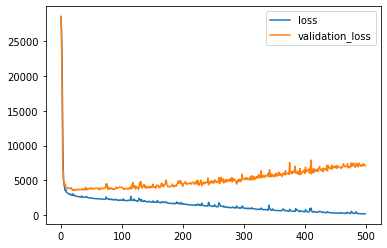

In [24]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()

## Great, the model is overfitting, let's try dropout

In [0]:
i_layer = Input(shape = (D,))
h_layer = Dense(64, activation='relu')(i_layer)
h_layer = Dropout(0.5)(h_layer)
h_layer = Dense(128, activation='relu')(h_layer)
h_layer = Dropout(0.5)(h_layer)
h_layer = Dense(256, activation='relu')(h_layer)
h_layer = Dropout(0.5)(h_layer)
o_layer = Dense(1, activation='relu')(h_layer)
model = Model(i_layer, o_layer)

In [26]:
#custom_opt = tf.keras.optimizers.Adam(0.01)
model.compile(
    optimizer='adam',
    loss='mse')
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 500, verbose=1)


Epoch 1/500
12/12 [==============================] - 0s 9ms/step - loss: 28526.5918 - val_loss: 29070.9219
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 27266.7168 - val_loss: 27181.1348
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 24258.9199 - val_loss: 22444.3867
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 18744.7285 - val_loss: 14395.0166
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 10947.9688 - val_loss: 7450.7256
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 6368.3574 - val_loss: 5670.4751
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 6356.1772 - val_loss: 5460.3555
Epoch 8/500
12/12 [==============================] - 0s 4ms/step - loss: 5218.4951 - val_loss: 5165.3594
Epoch 9/500
12/12 [==============================] - 0s 5ms/step - loss: 5179.6216 - val_loss: 4936.0513
Epoch 10/500
12/12 [==========================

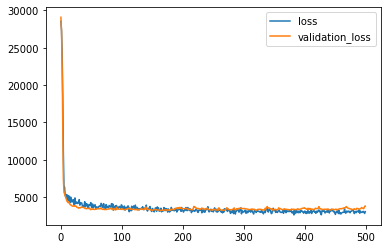

In [27]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()